In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install xlrd==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [5]:
data = pd.read_excel('/content/drive/MyDrive/titanic3.xls')

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
data = data.drop(['name','sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [7]:
data = data.dropna(axis=0)

In [8]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [ ]:
data.columns

Index(['pclass', 'survived', 'sex', 'age'], dtype='object')

In [8]:
data['sex'].replace(['male', 'female'], [1,2], inplace=True)

In [9]:
y = data['survived']

In [11]:
data

,pclass,survived,sex,age
0,1,1,2,29.0000
1,1,1,1,0.9167
2,1,0,2,2.0000
3,1,0,1,30.0000
4,1,0,2,25.0000
...,...,...,...,...
1301,3,0,1,45.5000
1304,3,0,2,14.5000
1306,3,0,1,26.5000
1307,3,0,1,27.0000


In [10]:
X = data.drop('survived', axis = 1)

In [ ]:
y

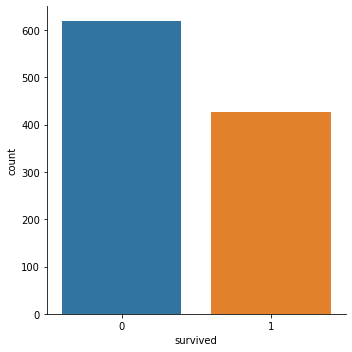

In [14]:
import seaborn as sns 
sns.catplot(data=data, x="survived", kind="count")


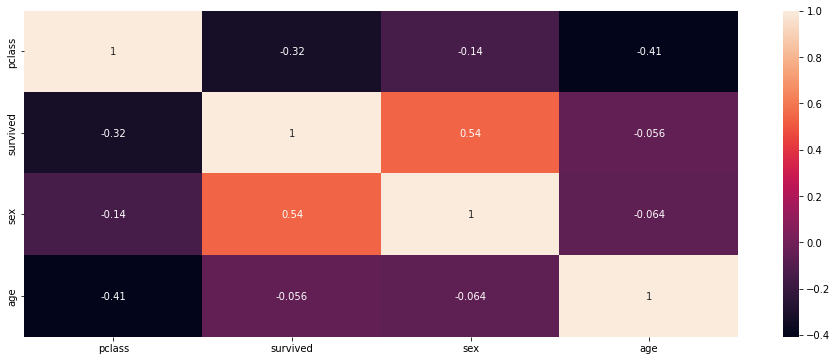

In [15]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)

**I) KNeighborsClassifier**

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
def train_and_test_KNNmodel(n , m ,X_train, y_train, X_test) :

  model = KNeighborsClassifier(n_neighbors=n , metric=m)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  score = model.score(X_test, y_test)
  print("pred = \n",pred)
  print("score = \n",score)
  return score 


In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def ShuffleSplit_Split(iter, size,n , m , X,y ) :
  cv = ShuffleSplit(iter, test_size= size)

  l = cross_val_score(KNeighborsClassifier(n_neighbors=n , metric=m), X, y, cv=cv)
  return l 

In [19]:
from sklearn.model_selection import GridSearchCV
def GridSearchCV_KNN(X_train, y_train) : 
  param_grid = {"n_neighbors": np.arange(1,50),
                "metric": ['euclidean', 'cosine', 'manhattan' ]}
  model = KNeighborsClassifier()
  grid = GridSearchCV(model, param_grid, cv=5)
  grid.fit(X_train, y_train)
  return grid

In [30]:
grid = GridSearchCV_KNN(X, y)
grid.best_score_

0.71626338573707

In [31]:
best_param = grid.best_params_

In [32]:
best_param

{'metric': 'cosine', 'n_neighbors': 25}

In [24]:
print("best_n_neighbors = {} with score = {} using {} metric".format(best_param['n_neighbors'],grid.best_score_, best_param['metric']))

best_n_neighbors = 18 with score = 0.8074707727402337 using cosine metric


In [34]:
score = train_and_test_KNNmodel(best_param['n_neighbors'] , best_param['metric'] ,X_train, y_train, X_test)
l = ShuffleSplit_Split(7, 0.2 , best_param['n_neighbors'] , best_param['metric'] , X,y )
print('score = ',score)
print(l)
print(l.mean())

pred = 
 [0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0]
score = 
 0.7666666666666667
score =  0.7666666666666667
[0.8        0.81904762 0.8047619  0.77619048 0.8        0.79047619
 0.81428571]
0.8006802721088435
